# Supervised Learning Assignment

# Objective:  The classification goal is to predict the likelihood of a liability customer buying personal loans. 

**Data Description:**  
    The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.
    
**Domain:**
    Banking
    
**Context:**
    This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

# Task: Import the necessary libraries

In [228]:
#import the libraries for EDA
import numpy as np
import pandas as pd

#import libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing lbraries from the SCIKIT LEARN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Task: Read the data as a data frame

In [229]:
#file is stored in the local respositoriy
df_bank = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

# Task:  Perform basic EDA

In [230]:
#checking the loaded value- Default top 5 rows
df_bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Shape of the data

In [231]:
print(f" Shape of the insurance data set: {df_bank.shape}\n")
total_rows=df_bank.shape[0]
total_cols=df_bank.shape[1]
print(f" Total no of rows in the dataset: {total_rows}")
print(f" Total no of the column in the dataset: {total_cols}")

 Shape of the insurance data set: (5000, 14)

 Total no of rows in the dataset: 5000
 Total no of the column in the dataset: 14


# Data type of each attribute

In [232]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Checking the presence of missing values

In [233]:
print('Total number of missing values:',df_bank.isnull().sum().sum())
print('Total missing values for each attribute:')
print(df_bank.isnull().sum())

Total number of missing values: 0
Total missing values for each attribute:
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


# 5 point summary of numerical attributes

The five-number summary involves the calculation of 5 summary statistical quantities: namely:
1. Minimum: The smallest observation in the sample.
2. 1st Quartile: The 25th percentile.
3. Median: The middle value in the sample, also called the 50th percentile or the 2nd quartile.
4. 3rd Quartile: The 75th percentile.
5. Maximum: The largest observation in the sample.

In [234]:
#analysze the distribution of the various attributes
df_5pt_summ=df_bank.describe().T
df_5pt_summ

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observation**: Column "Experience" has some **negative** value. Experience can not be nevettive, either it should be consider 0 or to be modified with the mean value or the rows need to be ignored, It could also possibly some error in data.

In [235]:
#check the ammount of negative values
df_bank[df_bank['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

**Observation:** As the Number of records are more, deleting the rows is not a good idea. Also the mean value of Experience column is 20 years. So replacing with the mean value may further cause the data error, hence let us replace those values with the absolute values as it could have been a typing error.

In [236]:
#replace -ve experiencevalues with the absolute values
df_bank['Experience'] = df_bank["Experience"].abs()
#check the ammount of negative values
df_bank[df_bank['Experience'] < 0]['Experience'].value_counts()

Series([], Name: Experience, dtype: int64)

In [237]:
#Lets analysze the distribution of the attributes after the replacement
df_bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observation:** Now the data looks clean, with no negative Experience

In [238]:
# Let us look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
df_bank.groupby(["Personal Loan"]).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [239]:
## Target Variable Personal Loan Frequency Distribution
freq = df_bank['Personal Loan'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['proportion'] = freq['count'] / sum(freq['count'])
freq

,Personal Loan,count,proportion
0,0,4520,0.904
1,1,480,0.096


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E8F8967A48>]],
      dtype=object)

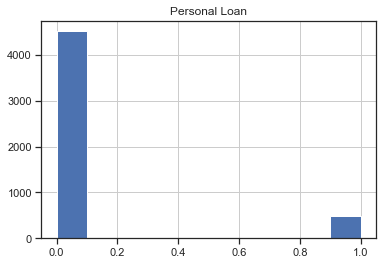

In [240]:
df_bank.hist(column='Personal Loan')

**Observation:** Most of the customers not opted for personal loan.The ratio is almost 1:10 in favor not opted loan.

# Task : Studying the attributes - Find relationship between different attributes

In [241]:
#Lets Generate the Heat Map Distribution
df_bank.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


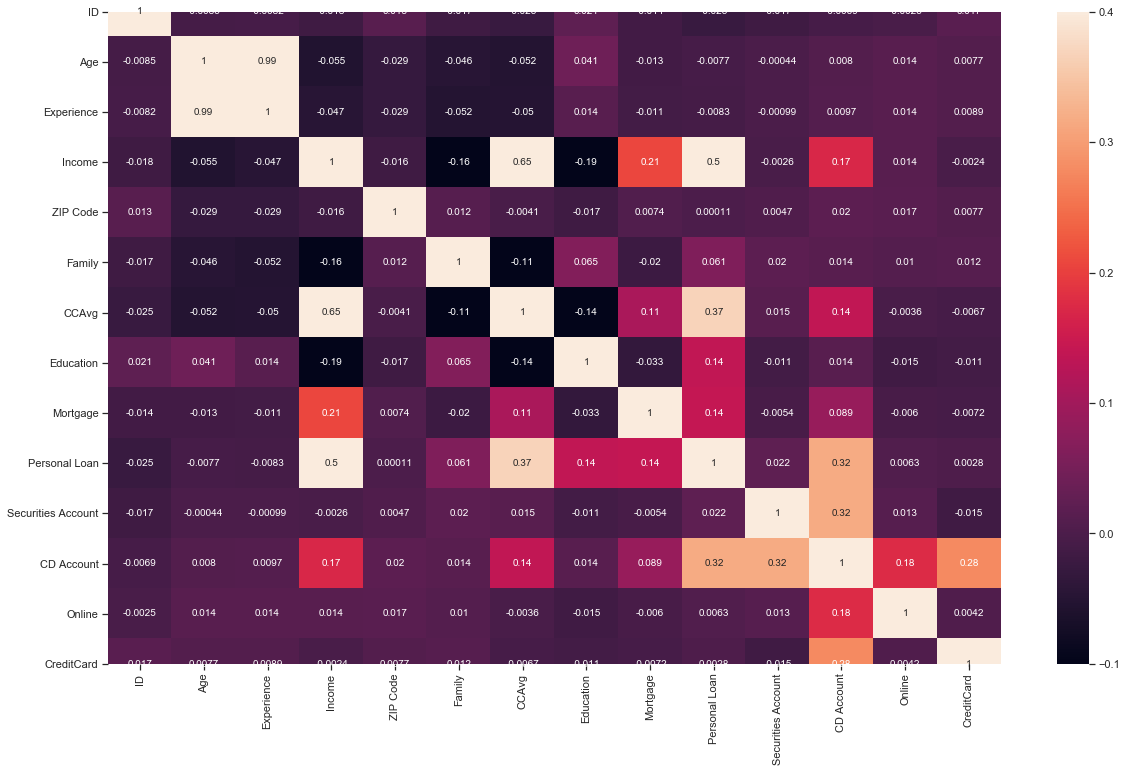

In [242]:
plt.figure (figsize= (20,12))
sns.heatmap(df_bank.corr(), annot=True, vmin=-0.1, vmax=.4)

Observations:
1. Age and Experience are highly correlated(.99)
2. Personal Loan has a moderately high correlation with : (Income, CCAvg, CD Account)
3. Personal Loan has a low correlation with : (Age, Experience,Family, Securities Account, Online,Credit Card 
4. CD Account is again dependent on (Credit Card, Securities Account, Online, CCAvg and Income)
5. Income has an influences on CD Account, Personal Loan, Mortgage, CCAvg.
6. Income has very low corellation with Age, Experience or Family
7. Education has very low co-relation with income

C:\Users\kausiks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kausiks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


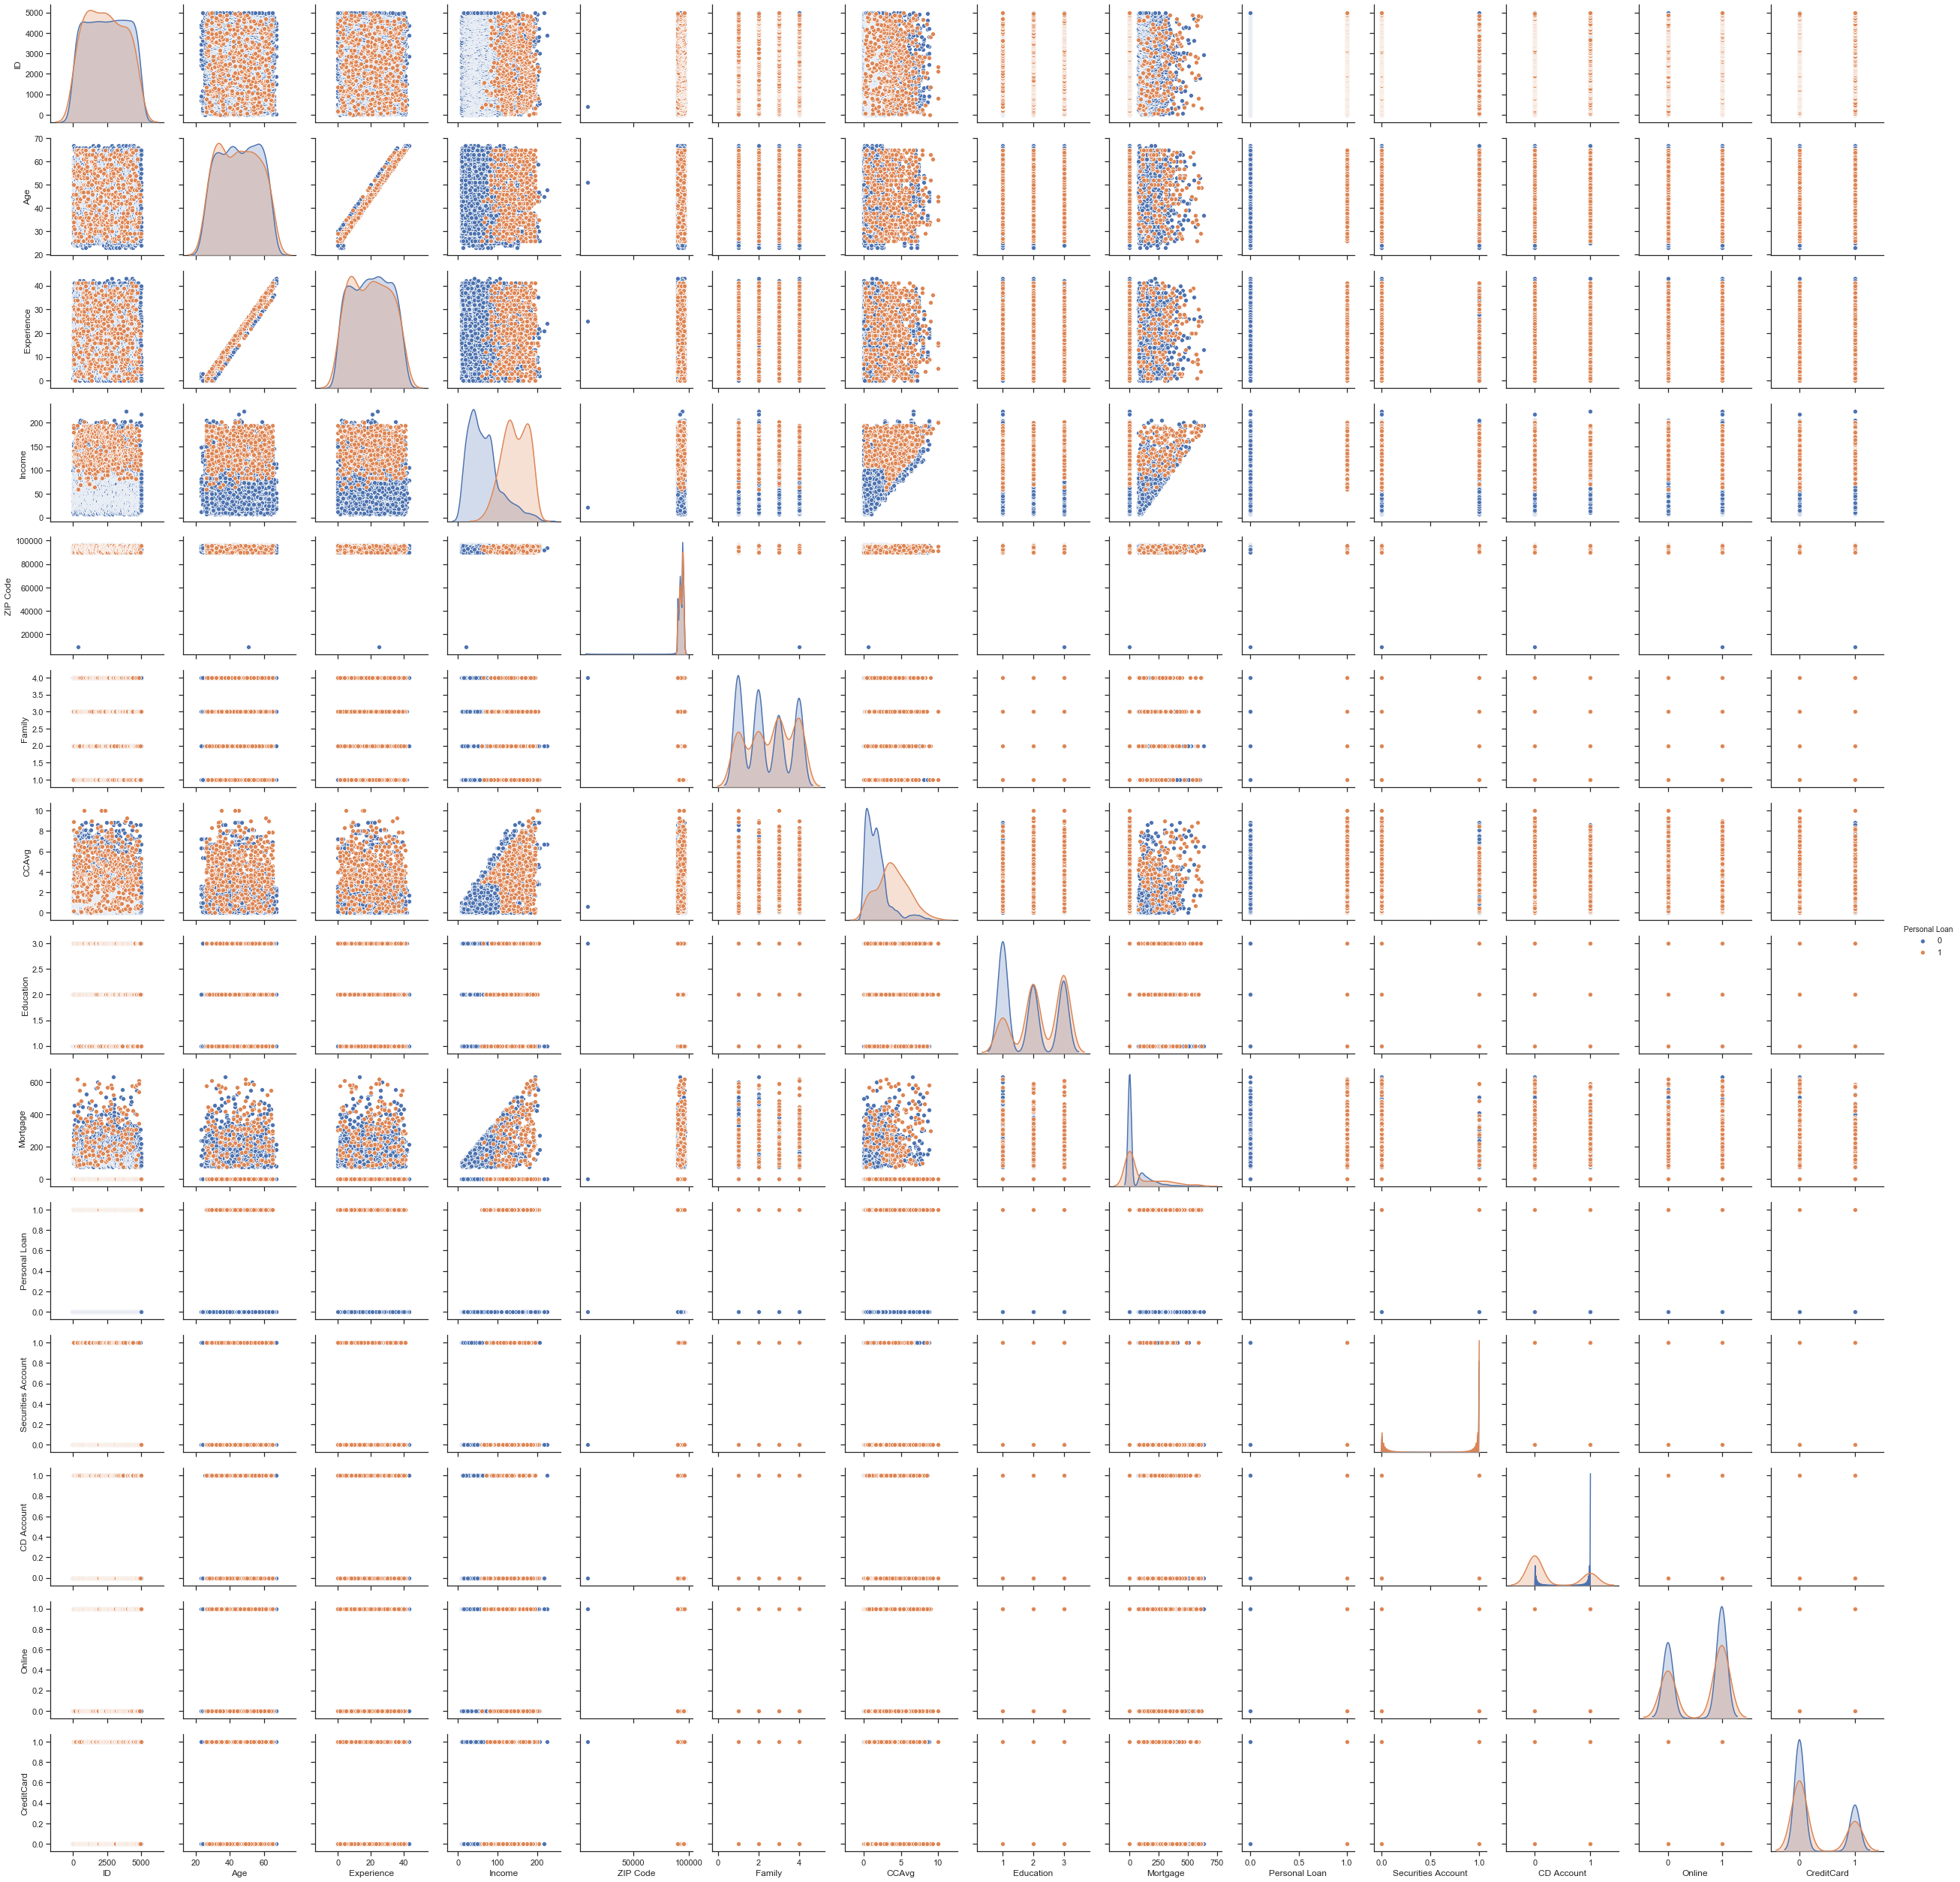

In [243]:
sns.pairplot(df_bank , hue = "Personal Loan")

Text(0.5, 0, 'Mortgage')

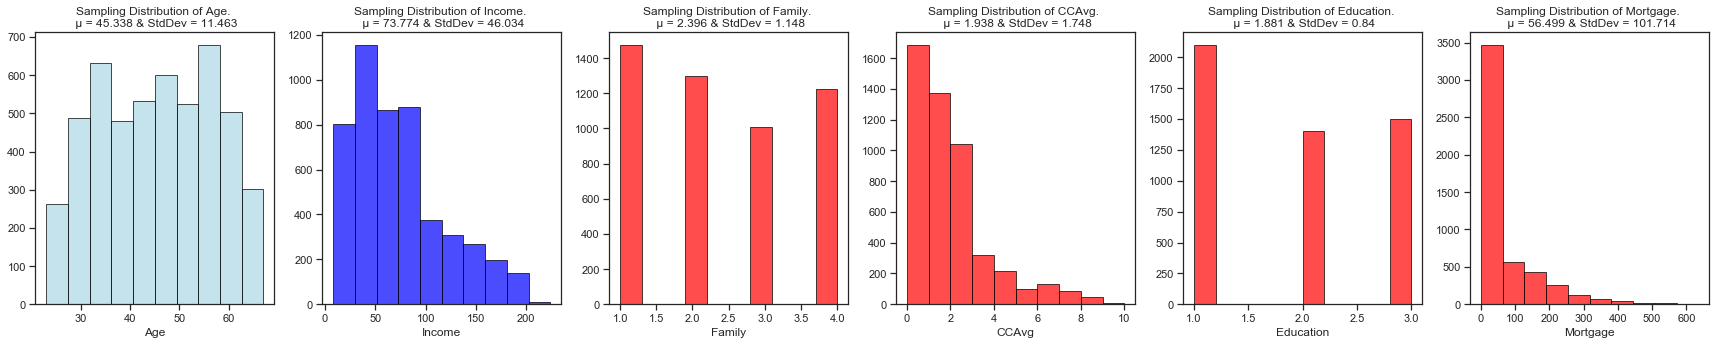

In [244]:
#Distribution of numerical attributes using histogram
plt.figure(figsize= (30,5))
plt.subplot(1,6,1)
plt.hist(df_bank['Age'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.title(f"Sampling Distribution of Age. \n \u03bc = {round(df_bank['Age'].describe().loc['mean'], 3)} & StdDev = {round(df_bank['Age'].describe().loc['std'],3)}")
plt.xlabel('Age')
plt.subplot(1,6,2)
plt.hist(df_bank['Income'], color='blue', edgecolor = 'black', alpha = 0.7)
plt.title(f"Sampling Distribution of Income. \n \u03bc = {round(df_bank['Income'].describe().loc['mean'], 3)} & StdDev = {round(df_bank['Income'].describe().loc['std'],3)}")
plt.xlabel('Income')
plt.subplot(1,6,3)
plt.hist(df_bank['Family'], color='red', edgecolor = 'black', alpha = 0.7)
plt.title(f"Sampling Distribution of Family. \n \u03bc = {round(df_bank['Family'].describe().loc['mean'], 3)} & StdDev = {round(df_bank['Family'].describe().loc['std'],3)}")
plt.xlabel('Family')
plt.subplot(1,6,4)
plt.hist(df_bank['CCAvg'], color='red', edgecolor = 'black', alpha = 0.7)
plt.title(f"Sampling Distribution of CCAvg. \n \u03bc = {round(df_bank['CCAvg'].describe().loc['mean'], 3)} & StdDev = {round(df_bank['CCAvg'].describe().loc['std'],3)}")
plt.xlabel('CCAvg')
plt.subplot(1,6,5)
plt.hist(df_bank['Education'], color='red', edgecolor = 'black', alpha = 0.7)
plt.title(f"Sampling Distribution of Education. \n \u03bc = {round(df_bank['Education'].describe().loc['mean'], 3)} & StdDev = {round(df_bank['Education'].describe().loc['std'],3)}")
plt.xlabel('Education')
plt.subplot(1,6,6)
plt.hist(df_bank['Mortgage'], color='red', edgecolor = 'black', alpha = 0.7)
plt.title(f"Sampling Distribution of Mortgage. \n \u03bc = {round(df_bank['Mortgage'].describe().loc['mean'], 3)} & StdDev = {round(df_bank['Mortgage'].describe().loc['std'],3)}")
plt.xlabel('Mortgage')

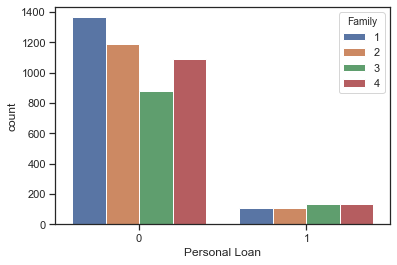

In [245]:
#Distribution of Personal Loan attributes corresponding to Family
sns.countplot(x='Personal Loan',hue='Family',data=df_bank)
table=pd.crosstab(df_bank['Family'],df_bank['Personal Loan'])

**Observation** Personal loan are taken more for family size of more than 3

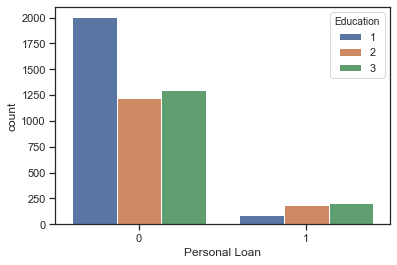

In [246]:
#Distribution of Personal Loan attributes corresponding to Education
sns.countplot(x='Personal Loan',hue='Education',data=df_bank)
table=pd.crosstab(df_bank['Education'],df_bank['Personal Loan'])

**Observation** undergraduate has very less no of taking the loan
Given Level of education of the customer (Categorical variable) 1 = Undergraduate 2 = Graduate 3 = Post Graduate 

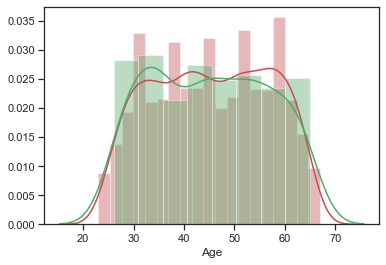

In [247]:
#Distribution of Personal Loan attributes corresponding to Age
sns.distplot( df_bank[df_bank['Personal Loan'] == 0]['Age'], color = 'r')
sns.distplot( df_bank[df_bank['Personal Loan'] == 1]['Age'], color = 'g')

**Observation** no impact due to Age for taking personal loan

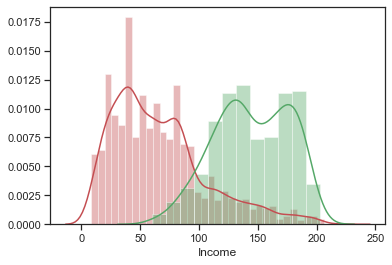

In [248]:
#Distribution of Personal Loan attributes corresponding to Income
sns.distplot( df_bank[df_bank['Personal Loan'] == 0]['Income'], color = 'r')
sns.distplot( df_bank[df_bank['Personal Loan'] == 1]['Income'], color = 'g')

**Observation** Income with more than 50 is has a higher probability of getting the personal loan

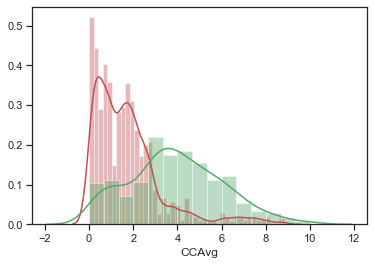

In [249]:
#Distribution of Personal Loan attributes corresponding to CCAvg
sns.distplot( df_bank[df_bank['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( df_bank[df_bank['Personal Loan'] == 1]['CCAvg'], color = 'g')

**Observation** higher CCAvg spending customer is more likely to get the personal loan

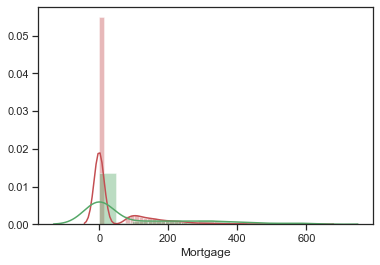

In [250]:
#Distribution of Personal Loan attributes corresponding to Mortgage
sns.distplot( df_bank[df_bank['Personal Loan'] == 0]['Mortgage'], color = 'r')
sns.distplot( df_bank[df_bank['Personal Loan'] == 1]['Mortgage'], color = 'g')

**Observation** higher mortgage is more likely to get the loan

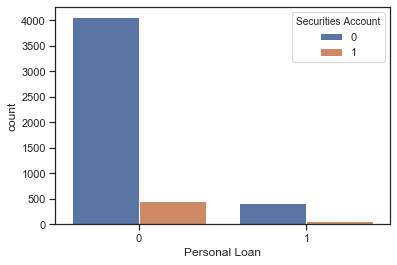

In [251]:
#Distribution of Personal Loan attributes corresponding to Securities Account
sns.countplot(x='Personal Loan',hue='Securities Account',data=df_bank)
table=pd.crosstab(df_bank['Securities Account'],df_bank['Personal Loan'])

**Observation** securities account is not impacting taking loan

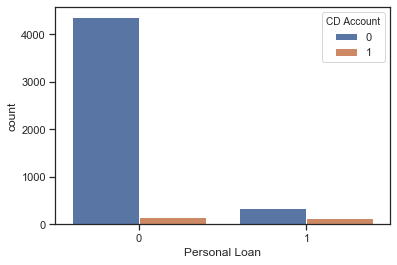

In [252]:
#Distribution of Personal Loan attributes corresponding to CD Account
sns.countplot(x='Personal Loan',hue='CD Account',data=df_bank)
table=pd.crosstab(df_bank['CD Account'],df_bank['Personal Loan'])

**Observtion** customers having CD account have high prob of taking loan

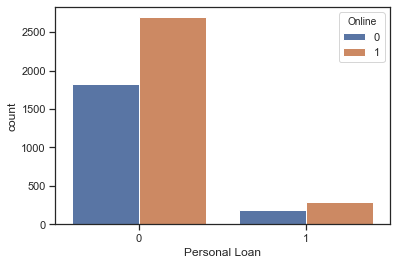

In [253]:
#Distribution of Personal Loan attributes corresponding to Online
sns.countplot(x='Personal Loan',hue='Online',data=df_bank)
table=pd.crosstab(df_bank['Online'],df_bank['Personal Loan'])

**Observation** Online has zero impact on the Personal Loan

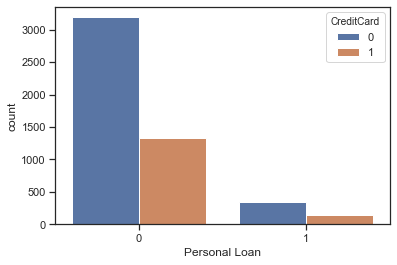

In [254]:
#Distribution of Personal Loan attributes corresponding to CreditCard
sns.countplot(x='Personal Loan',hue='CreditCard',data=df_bank)
table=pd.crosstab(df_bank['CreditCard'],df_bank['Personal Loan'])

**Observation** Credit Card has zero impact on the Personal Loan

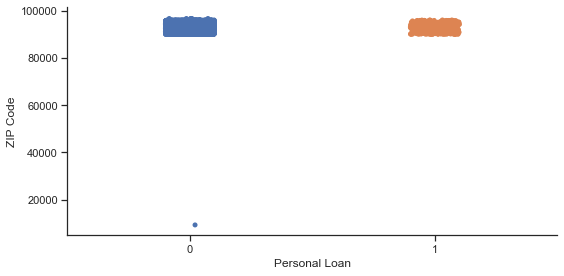

In [255]:
#Distribution of Personal Loan attributes corresponding to ZIP Code
sns.set(style='ticks',color_codes=True)
sns.catplot(x='Personal Loan',y='ZIP Code',data=df_bank, height=4, aspect=2)

**Observation** there is not any dependency of ZIP code with personal Loan

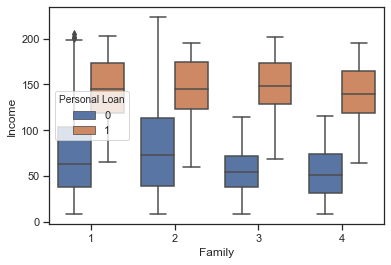

In [256]:
#Distribution of Personal Loan attributes corresponding to Family and Income
sns.boxplot(x='Family',y='Income',hue='Personal Loan',data=df_bank)

**Observation** Family with income less than 100k are less likely to get loan

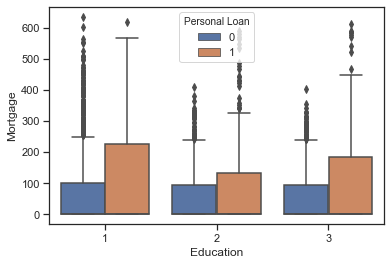

In [257]:
#Distribution of Personal Loan attributes corresponding to Education and Mortgage
sns.boxplot(x='Education',y='Mortgage',hue='Personal Loan',data=df_bank)

**Observation** Customers having high mortgages gets personal loan

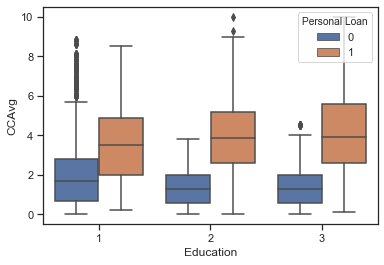

In [258]:
#Distribution of Personal Loan attributes corresponding to Education and CCAvg
sns.boxplot(x='Education',y='CCAvg',hue='Personal Loan',data=df_bank)

**Observation** Customers having high CCAvg gets personal loan

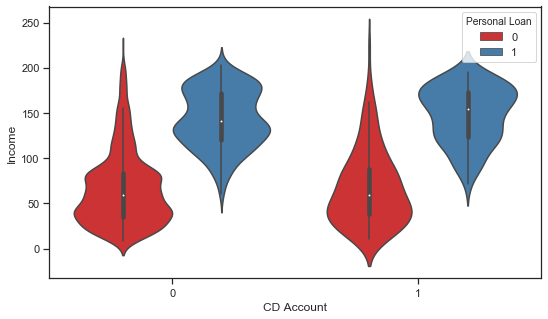

In [259]:
plt.figure(figsize= (30,5))
plt.subplot(1,3,1)
sns.violinplot(x="CD Account",y="Income",data=df_bank,hue='Personal Loan',palette='Set1')

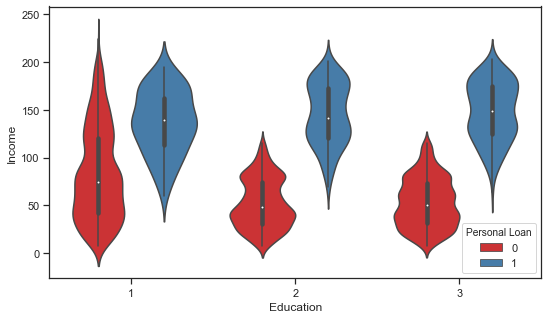

In [260]:
plt.figure(figsize= (30,5))
plt.subplot(1,3,1)
sns.violinplot(x="Education",y="Income",data=df_bank,hue='Personal Loan',palette='Set1')

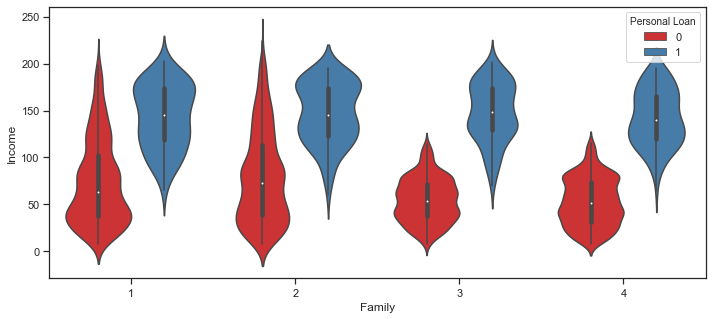

In [261]:
plt.figure(figsize= (40,5))
plt.subplot(1,3,1)
sns.violinplot(x="Family",y="Income",data=df_bank,hue='Personal Loan',palette='Set1')

**Observations Summary**
1. Personal loan are taken more for family size of more than 3
2. Undergraduate has very less no of taking the loan Given Level of education of the customer (Categorical variable) 1 = Undergraduate 2 = Graduate 3 = Post Graduate
3. No impact due to Age for taking personal loan
4. Income with more than 50 is has a higher probability of getting the personal loan
5. CCAvg spending customer is more likely to get the personal loan
6. Higher mortgage is more likely to get the loan
7. Securities account is not impacting taking loan
8. Customers having CD account have high prob of taking loan
9. Online has zero impact on the Personal Loan
10. Credit Card has zero impact on the Personal Loan
11. There is not any dependency of ZIP code with personal Loan
12. Family with income less than 100k are less likely to get loan
13. Customers having high mortgages gets personal loan
14. Customers having high CCAvg gets personal loan

# Checking the presence of outliers in data

In [262]:
#for detecting outlier defined a function with data as input and then calculate the outlier values
def find_outliers(data):
    outlier_data=[]
    for i in data:
        outlier_data=[]
        stat=data[i].describe()
        min=stat.loc['min']
        Q1=stat.loc['25%']
        median=stat.loc['50%']
        Q3=stat.loc['75%']
        max=stat.loc['max']
        IQR=Q3-Q1
        #print(min,Q1,median,Q3,max,IQR)
        for j in data[i]:
            #print('Second iteration j val:',j)
            #print('Second iteration j:',j)
            if(j < (Q1 - 1.5 * IQR)):
                #print('out lier values',i,j,Q1,Q3,IQR)
                outlier_data.append(j)
                
            if(j > (Q3 + 1.5 * IQR)):
                #print('out lier values',i,j,Q1,Q3,IQR)
                outlier_data.append(j)

        print('Outliers data for',i,':',len(outlier_data))
        print(outlier_data)
        print('\n')
    return
out_data=find_outliers(df_bank)

Outliers data for ID : 0
[]


Outliers data for Age : 0
[]


Outliers data for Experience : 0
[]


Outliers data for Income : 96
[193, 194, 190, 188, 195, 191, 200, 205, 204, 195, 192, 194, 202, 195, 200, 193, 192, 195, 191, 188, 191, 190, 190, 194, 195, 192, 190, 195, 191, 192, 195, 192, 193, 190, 198, 201, 200, 188, 192, 190, 194, 201, 191, 191, 188, 203, 189, 193, 190, 204, 198, 201, 201, 191, 191, 195, 190, 188, 190, 195, 195, 205, 198, 190, 191, 191, 195, 194, 194, 202, 191, 199, 203, 188, 224, 188, 189, 191, 190, 195, 193, 204, 194, 195, 191, 188, 195, 188, 193, 199, 188, 199, 194, 201, 195, 218]


Outliers data for ZIP Code : 1
[9307]


Outliers data for Family : 0
[]


Outliers data for CCAvg : 324
[8.9, 8.1, 5.7, 8.0, 5.7, 5.6, 7.2, 7.4, 7.5, 6.5, 6.5, 7.8, 7.9, 6.8, 7.4, 7.5, 7.9, 6.2, 5.5, 6.9, 7.5, 7.3, 6.1, 6.33, 6.6, 5.3, 7.5, 6.8, 7.0, 6.6, 6.3, 7.5, 5.7, 8.3, 5.5, 6.9, 6.1, 6.0, 8.0, 6.8, 6.33, 7.8, 7.2, 6.5, 6.8, 6.0, 7.2, 8.6, 6.9, 6.1, 7.8, 6.0, 7.6, 7.4, 6.1, 7.0, 8

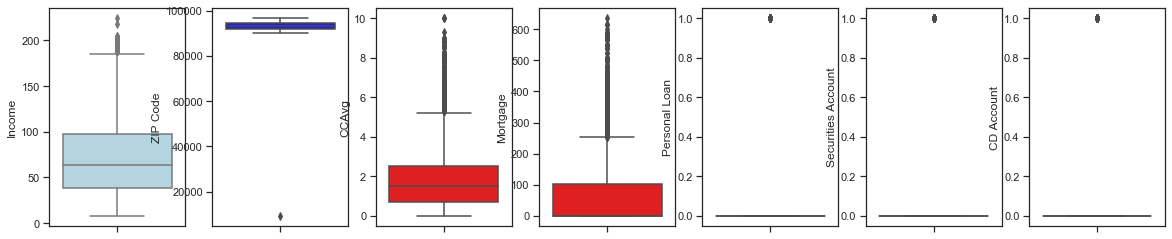

In [263]:
plt.figure(figsize= (20,4))
plt.subplot(1,7,1)
sns.boxplot(df_bank['Income'], orient='vertical',color='lightblue',)
plt.subplot(1,7,2)
sns.boxplot(df_bank['ZIP Code'], orient='vertical',color='blue')
plt.subplot(1,7,3)
sns.boxplot(df_bank['CCAvg'], orient='vertical',color='red')
plt.subplot(1,7,4)
sns.boxplot(df_bank['Mortgage'], orient='vertical',color='red')
plt.subplot(1,7,5)
sns.boxplot(df_bank['Personal Loan'], orient='vertical',color='red')
plt.subplot(1,7,6)
sns.boxplot(df_bank['Securities Account'], orient='vertical',color='red')
plt.subplot(1,7,7)
sns.boxplot(df_bank['CD Account'], orient='vertical',color='red')

**Observation** 

1. No Outliers data for ID,Age, Experience, Family, Education, Online and CreditCard
2. Only One Outlier data for ZIP Code
3. High number of Outliers found for the data Income, CCAvg, Mortage, Personal Loan, Securities Account, CD Account

In [264]:
df_bank

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# Task: Distribution of Target Column ‘Personal Loan’

Text(0.5, 0, 'Personal Loan')

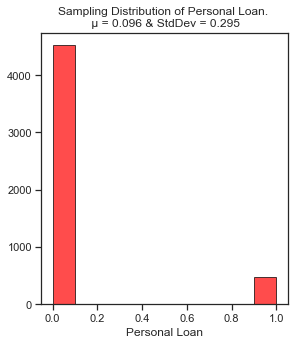

In [265]:
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
plt.hist(df_bank['Personal Loan'], color='red', edgecolor = 'black', alpha = 0.7)
plt.title(f"Sampling Distribution of Personal Loan. \n \u03bc = {round(df_bank['Personal Loan'].describe().loc['mean'], 3)} & StdDev = {round(df_bank['Personal Loan'].describe().loc['std'],3)}")
plt.xlabel('Personal Loan')

**Observation** Population who took personal loan is quite less compared to population who didn't take loan.

# Task: Split the data into training and test set in the ratio of 70:30 respectively

Separating the Dependent and independent (Target) variables into two different DF


In [266]:
#Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
y = df_bank['Personal Loan']
#Since ID doesnt have any effect on the data and is only a categorical variable,
#we shall drop the same along with Independent/Target variables.

X = df_bank.drop(['ID', 'Personal Loan'], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size=0.30, random_state=0)

# MODEL BUILDING USING LOGISTIC REGRESSION

In [267]:
# Importing lbraries from the SCIKIT LEARN
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
# Apply training data to the logistic regression model
log_model.fit(X_train, y_train)

C:\Users\kausiks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [268]:
#Predict the test results
test_pred = log_model.predict(X_test)

**Calculate the coefficients of logistic regression model**

In [269]:
#Accuracy Score
log_model_acuracy_score=accuracy_score(y_test, test_pred)
print("Logistic Regression Accuracy Score:", log_model_acuracy_score)
print("Logistic Regression Precision:",metrics.precision_score(y_test, test_pred))
print("Logistic Regression Recall:",metrics.recall_score(y_test, test_pred))

Logistic Regression Accuracy Score: 0.9193333333333333
Logistic Regression Precision: 0.5393258426966292
Logistic Regression Recall: 0.375


In [270]:
#Classification Report
print("Logistric Regression Classification Report: \n", metrics.classification_report(y_test, test_pred))

Logistric Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      1372
           1       0.54      0.38      0.44       128

    accuracy                           0.92      1500
   macro avg       0.74      0.67      0.70      1500
weighted avg       0.91      0.92      0.91      1500



# MODEL BUILDING USING KNN

In [271]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors= 3)

In [272]:
# Apply training data to the logistic regression model
knnmodel.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [273]:
#Predict the test results
predicted_labels = knnmodel.predict(X_test)

In [274]:
#Accuracy Score
knn_model_acuracy_score=accuracy_score(y_test, predicted_labels)
print("KNN Regression Accuracy Score: n=3", knn_model_acuracy_score)

KNN Regression Accuracy Score: n=3 0.906


**Observation** Trainig accuracy is .904, lets change the value of n and see whether it is improving or not

In [275]:
knnmodel = KNeighborsClassifier(n_neighbors= 5)
knnmodel.fit(X_train, y_train)
predicted_labels = knnmodel.predict(X_test)
knn_model_acuracy_score=accuracy_score(y_test, predicted_labels)
print("KNN Accuracy Score with n=5:", knn_model_acuracy_score)

KNN Accuracy Score with n=5: 0.912


**Observvation** Here with n=5 accuray is 0.912, it's increasing, so lets keep on increasing value of n

In [276]:
# cross validation
#Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from the above list using the Mis 
#classification error

In [277]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [278]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 15


In [279]:
#Plot misclassification error vs k (with k value on X-axis) using matplotlib.

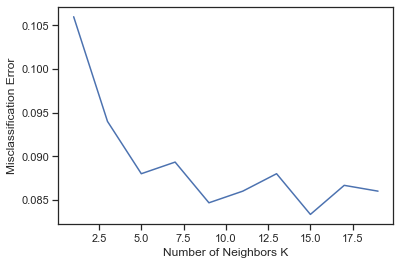

In [280]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [281]:
#Use k=3 as the final model for prediction
knnmodel = KNeighborsClassifier(n_neighbors= 15)

# fitting the model
knnmodel.fit(X_train, y_train)

# predict the response
predicted_labels = knnmodel.predict(X_test)

#Accuracy Score
knn_model_acuracy_score=accuracy_score(y_test, predicted_labels)
print("KNN Regression Accuracy Score: n=15", knn_model_acuracy_score)

#print("KNN Accuracy Score with n=3:", accuracy_score(y_test, predicted_labels))

KNN Regression Accuracy Score: n=15 0.9166666666666666


In [282]:
#Classification Report
print("KNN Classification Report: \n", metrics.classification_report(y_test,predicted_labels))

KNN Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      1372
           1       0.56      0.11      0.18       128

    accuracy                           0.92      1500
   macro avg       0.74      0.55      0.57      1500
weighted avg       0.89      0.92      0.89      1500



# MODEL BUILDING USING NAIVE BAYES

In [283]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
print(nb_model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [284]:
expected = y_test
predicted = nb_model.predict(X_test)

In [285]:
#Accuracy Score
print("Naive Bayes Accuracy Score: \n", accuracy_score(y_test, predicted, normalize = True))

Naive Bayes Accuracy Score: 
 0.8886666666666667


In [286]:
# summarize the fit of the model
print("Naive Bayes Classification Report: \n",metrics.classification_report(expected, predicted))

Naive Bayes Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      1372
           1       0.40      0.59      0.47       128

    accuracy                           0.89      1500
   macro avg       0.68      0.75      0.71      1500
weighted avg       0.91      0.89      0.90      1500



# Find which model perform better

**Observation:** Logistric Regression has slight Higher score(0.9193333333333333) compared to KNN with n=15(0.9166666666666666) And Naive Bayes has comparatively low accuracy score(0.8886666666666667). 

So Logistic Regresion Model will better fit here, as KNN will also has the inherent drawback of

    KNN is computationally expensive as it searches the nearest neighbors for the new point at the prediction stage.
    High memory requirement as KNN has to store all the data points.
    Prediction stage is very costly.
    Sensitive to outliers, accuracy is impacted by noise or irrelevant data.